<a href="https://colab.research.google.com/github/Satyake/Probabilistic-Learning-TensorFlow-/blob/main/Joint_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt


In [27]:
tfd=tfp.distributions
locs=[-1,1]
scales=[0.5,1]
batch_of_normals=tfd.Normal(loc=locs,scale=scales)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


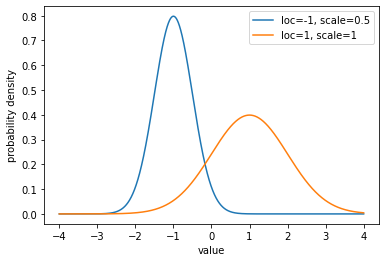

In [6]:
import seaborn as sns
import numpy as np 
t=np.linspace(-4,4,10000)
densities=batch_of_normals.prob(np.repeat(t[:,np.newaxis],2,axis=1))
sns.lineplot(t,densities[:,0],label='loc={}, scale={}'.format(locs[0],scales[0]))
sns.lineplot(t,densities[:,1],label='loc={}, scale={}'.format(locs[1],scales[1]))
plt.ylabel('probability density')
plt.xlabel('value')
plt.legend()
plt.show()


In [8]:
bivariate_normal_from_independent=tfd.Independent(batch_of_normals,reinterpreted_batch_ndims=1)

In [10]:
bivariate_normal_from_independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

In [11]:
#use independent to covert the batch to event shape


samples=bivariate_normal_from_independent.sample(10000)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


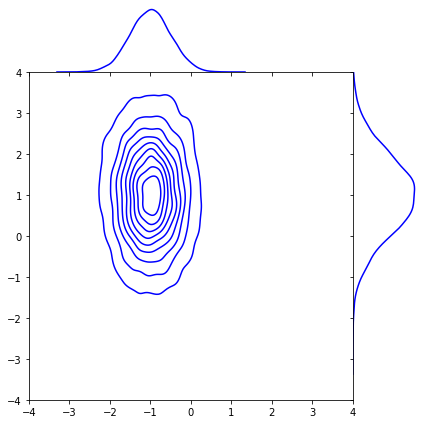

In [12]:
x1=samples[:,0]
x2=samples[:,1]
sns.jointplot(x1,x2,kind='kde',space=0, color='b',xlim=[-4,4],ylim=[-4,4])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


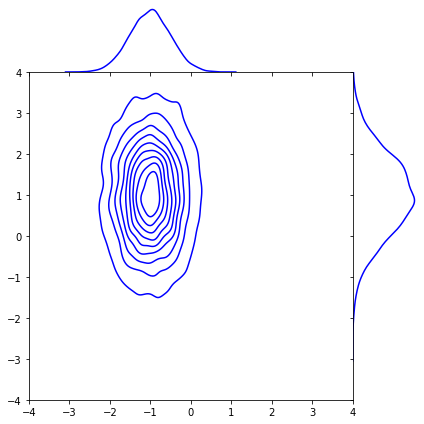

In [14]:

#Joint Distributions
bivariate_normal_from_multivariate=tfd.MultivariateNormalDiag(loc=locs,scale_diag=scales)
samples=bivariate_normal_from_multivariate.sample(10000)
x1=samples[:,0]
x2=samples[:,1]
sns.jointplot(x1,x2,kind='kde',space=0, color='b',xlim=[-4,4],ylim=[-4,4])

In [15]:
#shifting batch dims to event dims
loc=[[-100,-100],
     [100,100],
     [0,0]
     ]
scale=[[1,10],
       [1,10],
       [1,1]
      
]

normal_batch_3_by_2_event_1=tfd.Normal(loc=loc,scale=scale)

In [16]:
normal_batch_3_by_2_event_1

<tfp.distributions.Normal 'Normal' batch_shape=[3, 2] event_shape=[] dtype=float32>

In [19]:
# now have a batch of 3 bivariate Normal Distr
normal_batch_3_by_2_event_2=tfd.Independent(normal_batch_3_by_2_event_1)
normal_batch_3_by_2_event_2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[3] event_shape=[2] dtype=float32>

In [21]:
#log probs
normal_batch_3_by_2_event_2.log_prob(value=[[-100,-100],
     [100,100],
     [0,0]
     ])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-4.1404624, -4.1404624, -1.837877 ], dtype=float32)>

In [23]:
#can interpret all batch_dims as event dims
normals_batch_1_event_3_by2=tfd.Independent(normal_batch_3_by_2_event_1,reinterpreted_batch_ndims=2)
normals_batch_1_event_3_by2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[3, 2] dtype=float32>

In [25]:
#take log probs
normals_batch_1_event_3_by2.log_prob(value=[[-100,-100],
     [100,100],
     [0,0]
     ])

<tf.Tensor: shape=(), dtype=float32, numpy=-10.118802>

In [38]:
tfd=tfp.distributions
locs=[-1,1]
scales=[0.5,1]
batch_of_normals=tfd.Normal(loc=locs,scale=scales)

In [40]:
batch_of_normals.log_prob(value=[1,2])



<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-8.225791 , -1.4189385], dtype=float32)>

In [37]:
normal_batch_independent=tfd.Independent(batch_of_normals,reinterpreted_batch_ndims=1)
normal_batch_independent.log_prob(value=[1,2])

<tf.Tensor: shape=(), dtype=float32, numpy=-9.64473>